## **Sistemas Inteligentes - Práctica 1: Búsqueda Eurística.**



---



# **Índice**


1.   Introducción.
2.   Explicación del algoritmo A* y ejemplos de su funcionamiento.
3.   Explicación de otras heurísticas y ejemplos de sus funcionamientos.

  3.1. h = 0.

  3.2. Distancia de Manhattan.

  3.3. Distancia euclídea.

  3.4. Distancia cuadrática.

  3.5. Distancia de chebyshev.

  3.6. Compraciones y gráficas.

4.   Ejemplos del funcionamiento del algoritmo en distintos mapas.



---



# **1. Introducción**

En esta primera práctica de la asignatura se debe desarrollar el algoritmo A* para calcular el camino menos  costoso entre  dos casillas  de  un mapa. En  nuestro mapa concreto  tenemos  una  rejilla de celdas cuadradas con un punto de origen especificado por la celda en la que se encuentra el cerdito. Las celdas rojas representan celdas no transitables. Cuando se pulsa el ratón sobre una celda blanca se convierte en el destino y cambia a color verde. Se debe implementar el algoritmo A* para calcular el  camino  de  menor  coste entre el  cerdito  y la  celda  verde. Cuando  se  ha  calculado  el  camino  las celdas  correspondientes  aparecerán  coloreadas  en  amarillo  y  la  parte  inferior  de  la  ventana  se mostrará el coste del camino. Si se vuelve a pulsar en otra celda, el cerdito se posicionará en la celda verde y la nueva celda se convierte en el destino. El botón reset permite colocar al cerdito otra vez en la posición original. 


# **2. Explicación del algoritmo A* y ejemplos de su funcionamiento.**

Antes de comenzar con la explicación del algoritomo veo recomendable mencionar que he creado una clase Nodo (nodo.py), de la cual está formada las listas Interior y Frontera que utilizaremos en la función. 
Esta clase representa una casilla del mapa, la cual está formada por la propia clase Casilla proporcionada al principio de la práctica, los atributos 'g' (coste de ir desde la posición inicial hasta la posición actual ), 'f' (Coste del camino de coste mínimo desde el nodo inicial hasta el destino) y 'h' (estimación optimista de llegar desde la posición actual hasta el objetivo); los cuales almacenan el valor correspondiente de cada casilla; y por último un atributo padre, el cual almacena la casilla anterior con menor 'g'. En ella he definido una serie de métodos getters y setters, además de una función que comprueba si el propio nodo es la casilla destino.





In [ ]:
class Nodo():
    def __init__(self, cas, casAnterior, destino, newG):
        self.casilla = cas
        self.g = newG + calcularG(cas, casAnterior)
        self.h = 0
        # self.h = distanciaManhattan(destino, cas)
        # self.h = pitagoras(self.casilla, destino)
        # self.h = chebyshev(self.casilla, destino)
        # self.h = euclidean_distance(self.casilla, destino)
        self.f = self.g + self.h
        self.padre = None
        
    def __eq__(self, nodo2):
        return (self.casilla.getFila() == nodo2.getCasilla().getFila() and self.casilla.getCol() == nodo2.getCasilla().getCol())

    def getG(self):
        return self.g
    
    def getH(self):
        return self.h
    
    def getF(self):
        return self.f
    
    def getCasilla(self):
        return self.casilla
    
    def getPadre(self):
        return self.padre
    
    def setG(self, newG):
        self.g = newG
        
    def setH(self, destino):
        self.h = 0
        # self.h = distanciaManhattan(destino, self.casilla)
        # self.h = pitagoras(self.casilla, destino)
        # self.h = chebyshev(self.casilla, destino)
        # self.h = euclidean_distance(self.casilla, destino)
        
    def setF(self, newF):
        self.f = newF
        
    def setPadre(self, p):
        self.padre = p
    
    def esMeta(self, destino):
        return (self.casilla.getFila() == destino.getFila() and self.casilla.getCol() == destino.getCol())

Una vez mencionado lo anterior, podemos abordar el código del algoritmo A*. En primer lugar defino una serie de variables que considero necesarias para satisfacer ciertos requerimientos de la práctica. La primera variable que vemos es un contador, el cual va asignando a cada posición de una matriz que representa el mapa, el orden de exploración de los nodos a expandir durante la búsqueda del camino. La siguiente variable es la definición de la matriz que representa el mapa, la cual inicializamos con las dimensiones del mapa y posteriormente rellenamos todo de '-1', como se pide en el enunciado.
Posteriormente creo un nodo para la casilla inicial, una lista que estará compuesta por todos los nodos nodos pendientes de ser expandidos, 'listaFrontera', y una lista que almacena los nodos ya expandidos 'listaInterior'. También añado a la lista frontera el nodo inicial para que el algoritmo empiece con él. 

In [ ]:
def aEstrella(mapi, origen, destino, camino):
    cont = 0
    nodosExpandidos = 0
    mapaParaMostrar = inic(mapi)
    rellenarDeUnos(mapi, mapaParaMostrar)

    nodoOrigen = Nodo(origen, origen, destino, 0)
    nodoOrigen.setG(0)


    listaInterior = []
    listaFrontera = []
    listaFrontera.append(nodoOrigen)

Después de inializar las variables necesarias, creamos un bucle que se ejecute mientras haya algún nodo dentro de la listafrontera.
Inmediatamente, obtengo el nodo en lista frontera con menor 'f', para ello hago un bucle que recorra toda la lista y guarde el que tiene menor 'f' y lo asgino a la variable 'n'.

In [ ]:
while listaFrontera != []:        
    fMasPequeña = listaFrontera[0].getF()
    mejorNodo = listaFrontera[0]
    for x in listaFrontera:
        if x.getF() < fMasPequeña:
            fMasPequeña = x.getF()
            mejorNodo = x

    n = mejorNodo

Una vez obtenido el nodo comprobamos si es la casilla que el usuario ha pulsado (destino) con la función creada en el clase Nodo, y en el caso de que lo sea imprimimos el mapa en la interfaz gráfica. Para ello creo una lista dónde inserto el nodo final, y voy obteniendo los hijos de cada nodo y añadiendolos a la lista, de forma que cada nodo apunta en su atributo 'padre' a la mejor casilla anterior, así hasta llegar al nodo inicial. Después, con otro bucle asigno en la variable 'camino' una 'X', la cual significará que el camino recorrido en la interfaz gráfica se pinte de color amarillo. Seguidamente imprimimos por consola el mapa relleno por '-1' y por los números de los nodos expandidos (el cual veremos como se rellena posteriormente) y devolvemos la 'g' del último nodo, la cual indica el coste de llegar desde la casilla inicial hasta el destino. 

In [ ]:
if n.esMeta(destino):
    listaCamino = []
    listaCamino.append(n)
    
    hijo = n.getPadre()
    while hijo != nodoOrigen:
        listaCamino.append(hijo)
        hijo = hijo.getPadre()
        
    for c in listaCamino:
        camino[c.getCasilla().getFila()][c.getCasilla().getCol()] = 'X'
        
    mostrarElMapa(mapaParaMostrar, mapi)
    return n.getG()

En el caso de que el nodo no sea el destino se procederá de la siguiente forma.En primer lugar quitamos el nodo actual de la lista frontera, ya que en breve será expandido, y lo añadimos a la lista interior. A su vez, incrementamos la variable que cuenta los nodos expandidos 'cont', y actualizamos la matriz que será mostrada por pantalla cuando el algoritmo encuentre el destino. 
Posteriormente, creamos una variable con los hijos (casillas que son alcanzables) del nodo que estamos tratando, y que no están en la lista interior. Para ello hacemos uso de las dos siguientes funciones:

In [ ]:
def obtenerVecinos(mapi, origen, destino, camino, newG): 
    distancia = 1000 
    listaFront = []
    for i in range(origen.getFila() - 1, origen.getFila() + 2): 
        for j in range(origen.getCol() - 1, origen.getCol() + 2): 
            cas = Casilla(i, j) 
            
            if bueno(mapi, cas) and esOrigen(i, j, origen) == False: 
                nodo = Nodo(cas, origen, destino, newG) 
                listaFront.append(nodo)
                
    mapi.origen = destino 
            
    return listaFront

En la función de arriba, recorremos toda la variable 'mapi', la cual contiene el mapa, con las celdas que son alcanzables y las que no lo son. Con dos bucles recorremos las posiciones adyacentes a la casilla actual y comprobamos con la función 'bueno' (definida en main.py) y la función 'esOrigen' si la posición es correcta y en ese caso la añadimos a una lista, la cual devolveremos al terminar la función. También cambiamos que la nueva posición del cerdito sea la que hemos seleccionado como destino para el próxima movimiento. 

In [ ]:
def filtrarHijosEnListaInterior(listaInterior, hijos):
    listaResultado = []
    for x in hijos:
        if x not in listaInterior:
            listaResultado.append(x)
                        
    return listaResultado

Con la función adjuntada arriba creamos una lista con aquellos nodos adyacentes, filtrando en los que ya están en lista interior y de ese modo evitar entrar en bucles infinitos.

Una vez obtenida la lista con los hijos de 'n' que no están en lista interior, podemos recorrer a cada uno de esos nodos e ir calculandosu nueva información.
Lo primero que hacemos es calcular la 'g' de ese nodo, la cual es igual a la 'g' del nodo anterior más el coste de ir a su casilla (1 si es lateral y 1'5 si es diagonal). 

In [ ]:
else:
    listaFrontera.remove(n)
    listaInterior.append(n)
    
    cont += 1
    mapaParaMostrar[n.getCasilla().getFila()][n.getCasilla().getCol()] = cont
    
    vecinos = obtenerVecinos(mapi, n.getCasilla(), destino, camino, n.getG())
    hijosNoEnListaInterior = filtrarHijosEnListaInterior(listaInterior, vecinos)
    nodosExpandidos += 1
    for m in hijosNoEnListaInterior:
        gPrima = n.getG() + calcularG(n.getCasilla(), m.getCasilla())

Después comprobamos si el hijo actual está en la lista frontera. En el caso en el que esto no se cumpla le asignamos al nodo sus nuevos datos: 'g', 'h', 'f' y su padre. También los añadimos a lista frontera para expandirlo en próximas iteraciones, en el caso de que sea necesario.

In [ ]:
found = False
    for x in listaFrontera:
        if x == m:
            found = True
            m = x
            break
        

    if found == False:
        m.setG(gPrima)
        m.setH(destino)
        m.f = m.getG() + m.getH()
        m.setPadre(n)
        listaFrontera.append(m)

Si este nodo hijo está en lista frontera, y además su valor de 'g' prima es mejor que su anterior 'g', lo cual siginifica que a ese nodo se puede alcanzar con un menor coste, actualizamos su valor 'g' con el valor de 'g' prima, el valor de 'f' y su nuevo padre.

Para finalizar con el algoritmo, en el caso de que se haya pulsado una casilla no alacanzable, se vuelve a mostrar la matriz con el mapa por consola y se devuelve 'None'.

In [ ]:
elif gPrima < m.getG():
      m.setPadre(n)
      m.setG(gPrima)
      m.f = m.getG() + m.getH()
        
    mostrarElMapa(mapaParaMostrar, mapi)
    
    return None

Otras funciones auxiliares utilizadas para el algoritmo son las siguientes:

In [ ]:
def esOrigen(i, j, origen): # Esta función te dice si un punto (i, j) es el origen o no.
    return (i == origen.getFila() and j == origen.getCol())


def calcularG(casillaActual, casillaAnterior):
if casillaActual.getFila() != casillaAnterior.getFila() and casillaActual.getCol() != casillaAnterior.getCol():
    return 1.5
else:
    return 1


def mostrarElMapa(mapaParaMostrar, mapi):
    print("\n")
    for i in range(mapi.getAlto()):
        cadena = ""
        for j in range(mapi.getAncho()):
            cadena = cadena + " " + str(mapaParaMostrar[i][j])
            
        print(cadena)


def rellenarDeUnos(mapi, mapaParaMostrar):  # Esta función rellena la matriz que se muestra por la terminal de -1s.
    for i in range(0, mapi.getAlto()):
        for j in range(0, mapi.getAncho()):
            mapaParaMostrar[i][j] = -1

Una vez analizado el algoritmo de A* vamos a ver su funcionamiento con un pequeño ejemplo práctico. A partir del camino adjuntado en la imagen de abajo voy a realizar una traza del algoritmo.

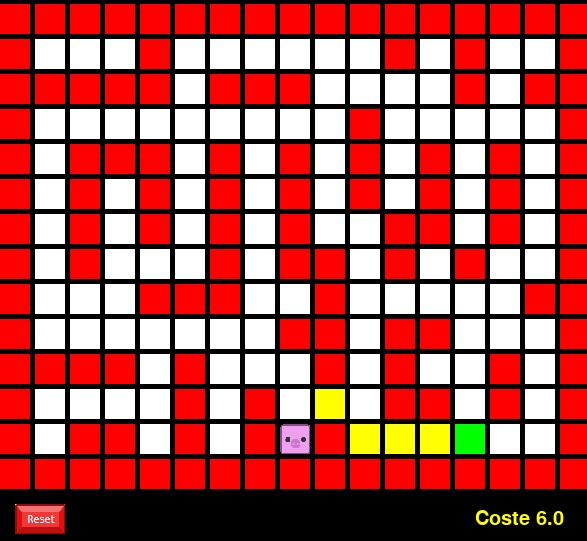

Antes de nada comentar que esta traza es realizado con la heurística de h = 0.

En primer lugar, añadimos nodo en el cual se situa el cerdo a lista frontera, para que el algoritmo lo expanda. Entramos al bucle que se ejecuta mientras lista frontera no esté vacía. Al haber solo un nodo, lo cogemos y comprobamos si es el nodo destino. Como no lo es, entramos al 'else', en el cual quitamos el nodo de lista frontera y lo añadimos a lista interior. Después obtenemos todos sus vecinos alcanzables mendiante las funciones explicadas anteriormente. Este nodo solo tiene 2 hijos, el de arriba a él y el de la diagonal derecha superior. Ahora recorremos a cada uno de estos hijos, obtenemos su 'g' a partir del nodo origen (1 para el primer hijo y 1'5 para el segundo), comprobamos si están en lista frontera y como no está actualizamos su información y los añadimos a lista frontera. Una vez terminada la primera iteración volvemos al bucle 'while', en el cual cogemos al nodo de la casilla de arriba al origen, el cual es el que tiene menor 'f'. Como no es la meta procedemos de igual manera que antes, sacamos el nodo de lista frontera y añadimos a lista interior, obtenemos sus 3 hijos que no están en lista interior y los recorremos. El nodo de arriba y el de la diagonal al no estar en lista interior almacenamos sus valores y añadimos a lista interior. El nodo de la derecha al sí pertenecer a lista frontera comprobamos si su nueva 'g' es mejor que la anterior, lo cual es falso, ya que la nueva 'g' vale 2 y la anterior 1'5. 
En la siguiente iteración cogemos el nodo del que acabamos de hablar, el cual es el que tiene menor 'f'. No es el destino asique procedemos igual, lo sacamos de lista frontera y añadimos a lista interior, expandimos el nodo y recorremos sus hijos alcanzables. El hijo de la diagonal superior izquierda ya está en lista frontera pero no tiene mejor 'g', por lo tanto lo dejamos tal cual. El resto de hijos almacena sus datos y son añadidos a lista frontera. 
En la siguiente iteración se coge el nodo dos casillas por encima del origen, el cual es expandido de igual manera que hemos hecho en pasadas iteraciones atentiendo a las condiciones establecias (lo salto ya que no es relevante para el camino principal). Como estamos una heurística de h = 0 los siguientes nodos a ser expandidos dependen del valor de su 'f', por lo tanto, vamos a ir expandiendo todos los nodos que sean añadidos a lista frontera de menor a mayor dependiendo de su 'f'. Del modo que he explicado anteriormente, continuamos hasta que encontramos el nodo destino, en este caso entramos al 'if' correspondiente y mediante los punteros de cada nodo a su nodo padre, el cual tiene menor coste para llegar al propio nodo, construímos una lista con el camino más óptimo. Actualizamos la variable camino para que al terminar el algoritmo el mapa de la interfaz gráfica sea pintado correctamente. Imprimimos el mapa por consola y devolvemos el valor del coste del camino, el cual corresponde con el del último nodo.

# **3. Explicación de otras heurísticas y ejemplos de sus funcionamientos.**

En este apartado vamos a ver todas las heurísticas implementadas y posteriormente haremos una gráfica comparativa para ver ciertos resultados y datos de cada una de estas heurísticas.

**3.1. h = 0.**

En primer lugar hemos utilizado la heurística de h = 0, la cual realiza una búsqueda por anchura hasta encontrar la casilla destino. Esta heurística es admisible, es decir, siempre encuentra el camino óptimo, aunque requiere un mayor coste computacional, ya que se expanden muchos nodos sin seguir un criterio en específico.

Ahora vamos a ver algunos ejemplos de como funciona el algoritmo A* con esta heurística:




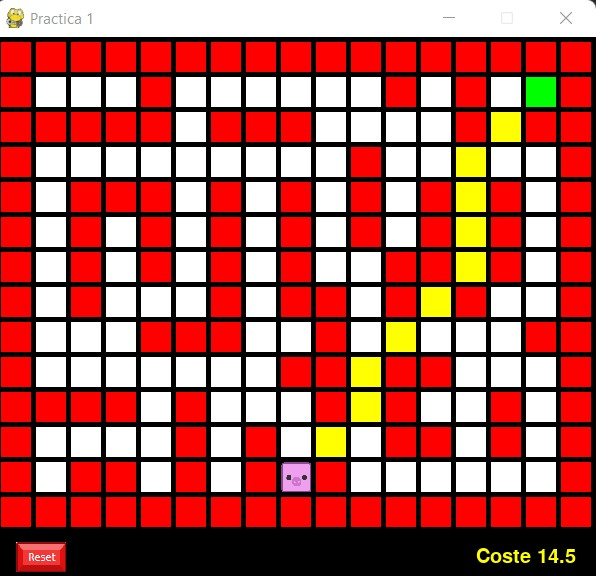

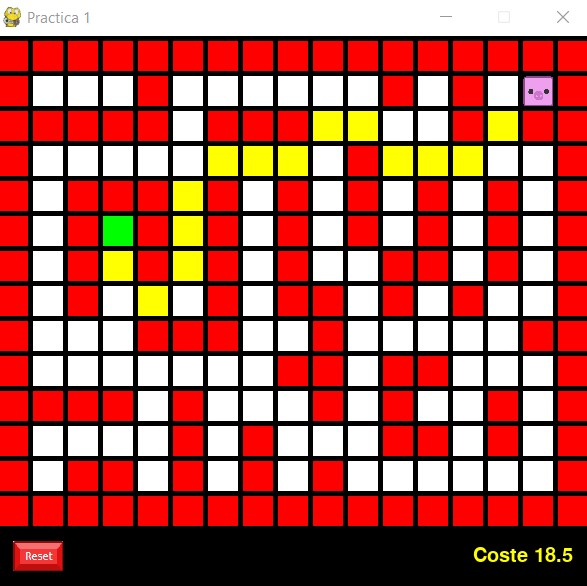

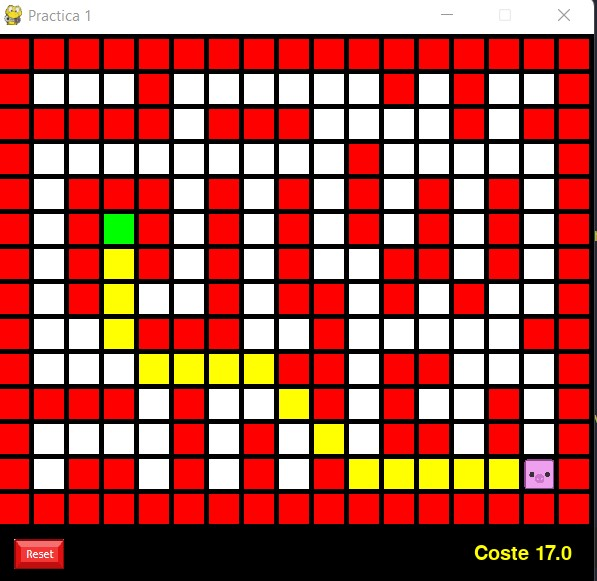

**3.2. Distancia de Manhattan.**

En segundo lugar vamos a utilizar la distancia de Manhattan, la cuál es la heurística más rápida y que menos nodos expande, aunque no garantiza encontrar la solución óptima.

La implementación de esta heurística se consigue en mi código cambiando los comentarios en la definción de la clase Nodo en el constructor y en el método 'setH(self, destino)'.

La implementación de la función es la siguiente:

In [ ]:
def distanciaManhattan(cas1, cas2):
    return abs(cas1.getFila() - cas2.getFila()) + abs(cas1.getCol() - cas2.getCol())

Ahora vamos a ver algunos ejemplos de como funciona el algoritmo A* con esta heurística:

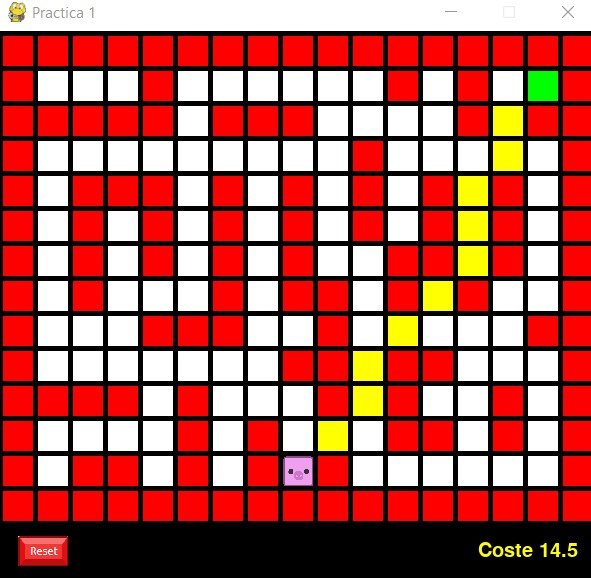

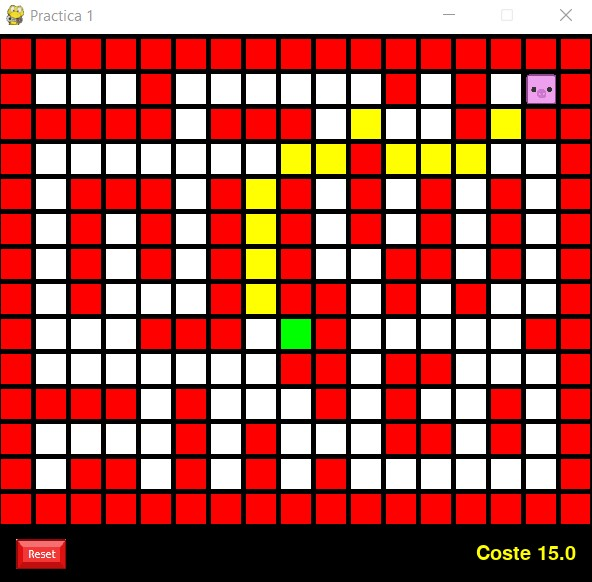

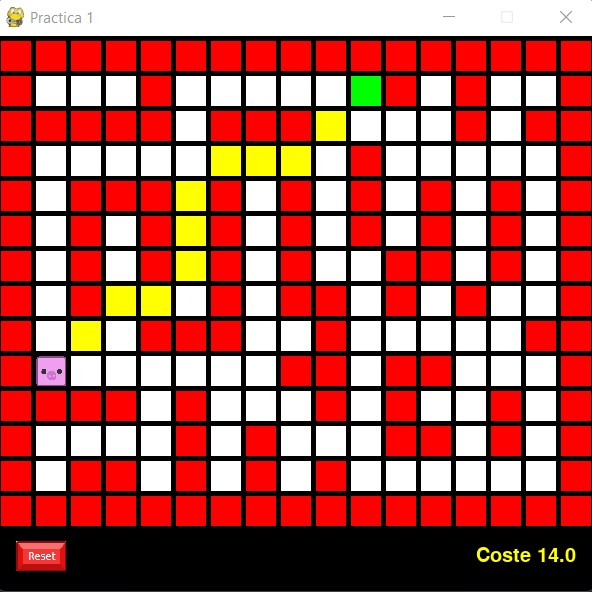

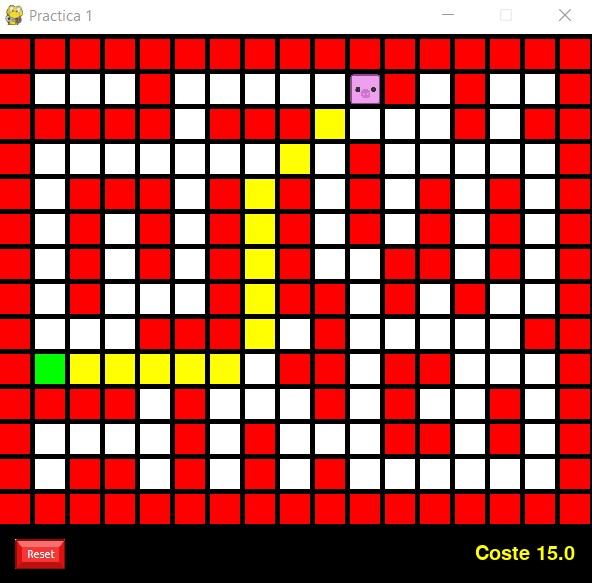

En estas dos últimas imagenes podemos ver como Manhattan no es una heurística admisible, ya que en un caso nos da el camino óptimo, pero en el otro saca un coste mayor para el mismo camino.

**3.3. Distancia euclídea.**



Ahora vamos a ver algunos ejemplos de como funciona el algoritmo A* con esta heurística:

In [ ]:
def euclidean_distance(cas1, cas2):
    return math.sqrt((cas2.getFila() - cas1.getFila())**2 + (cas2.getCol() - cas1.getCol())**2)

Ahora vamos a ver algunos ejemplos de como funciona el algoritmo A* con esta heurística:

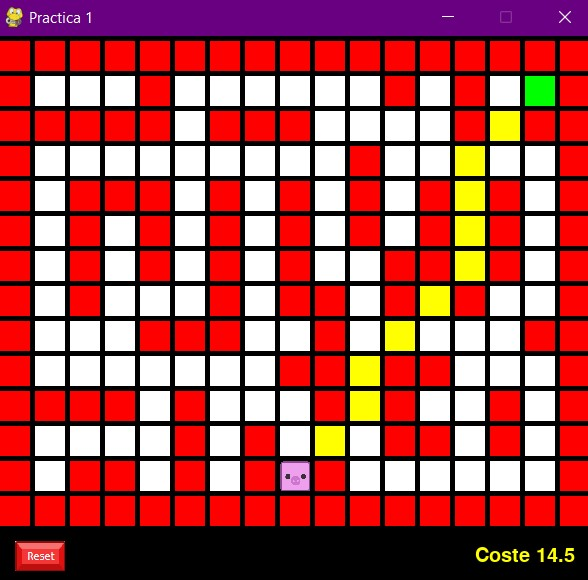

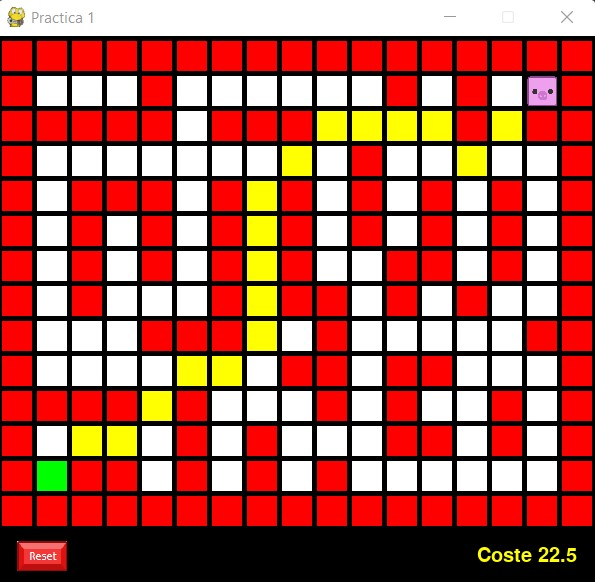

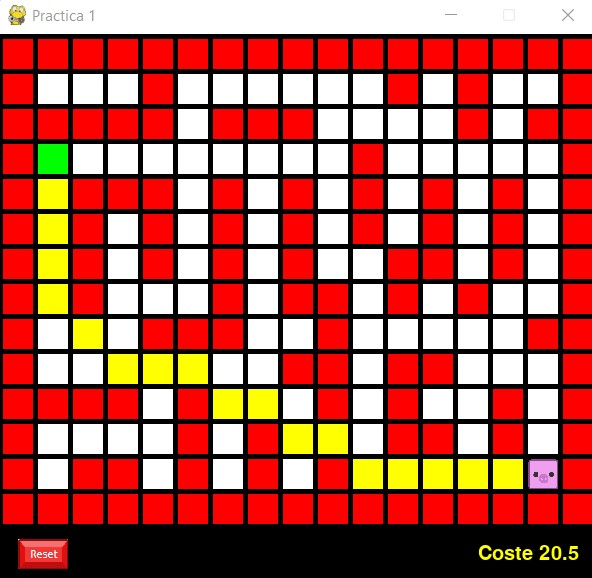

**3.4. Distancia cuadrática.**



In [ ]:
def pitagoras(cas1, cas2):
    return (cas2.getFila() - cas1.getFila())**2 + (cas2.getCol() - cas1.getCol())**2

Ahora vamos a ver algunos ejemplos de como funciona el algoritmo A* con esta heurística:

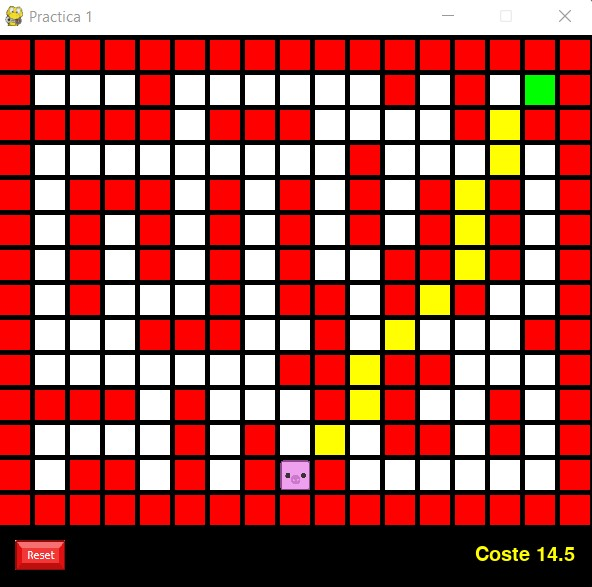

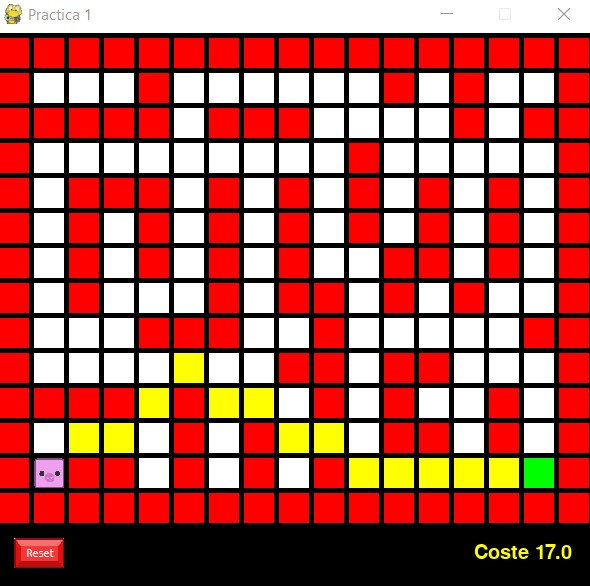

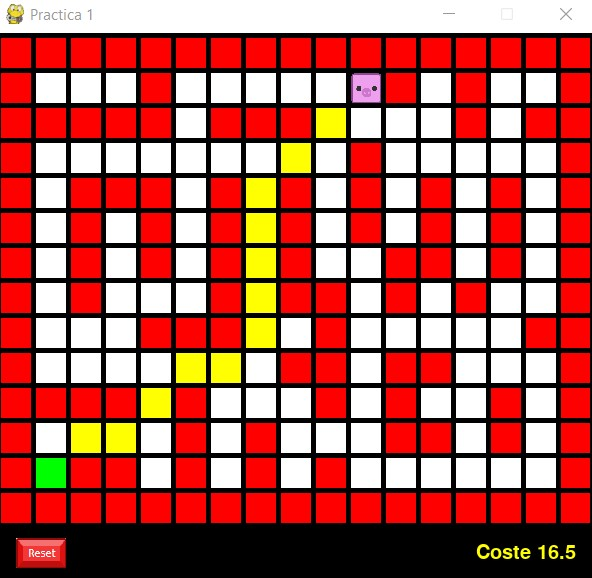



```
# Tiene formato de código
```

**3.5. Distancia de Chebyshev.**

La distancia de Chebysev es la mayor de las diferencias entre sus dimensiones. Por ejemplo, si las posiciones x (en un plano) de dos puntos son 2 y 5 (esto es, si la diferencia entre ellas es 3) y las posiciones y son -3 y 4 (esto es, si la diferencia entre ellas es 7), la distancia de Chebyshev es de 7 (valor máximo de 3 y 7).

Esta distancia viene dada por la siguiente expresión:



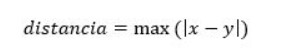

In [ ]:
def chebyshev(cas1, cas2):
    # return distance.chebyshev([cas1.getFila(), cas1.getCol()], [cas2.getFila(), cas2.getCol()])
    result = 0
    for i in range(2):
        if i == 0:
            d = abs(cas1.getFila() - cas2.getFila())
            result = max(result, d)
        else:
            d = abs(cas1.getCol() - cas2.getCol())
            result = max(result, d)
            
    return result

Ahora vamos a ver algunos ejemplos de como funciona el algoritmo A* con esta heurística:

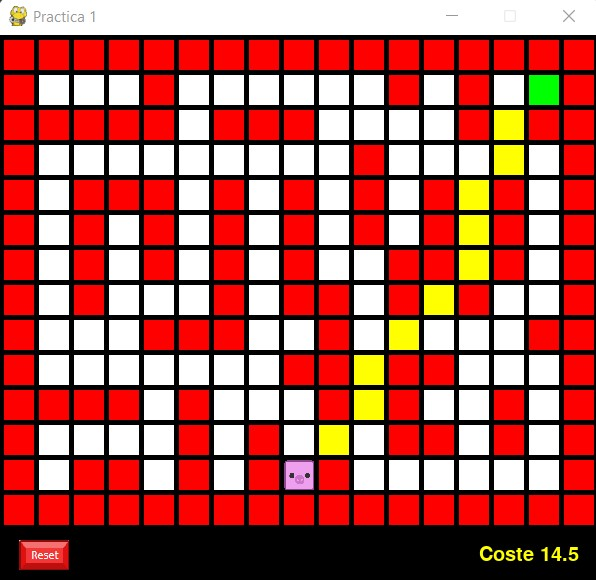

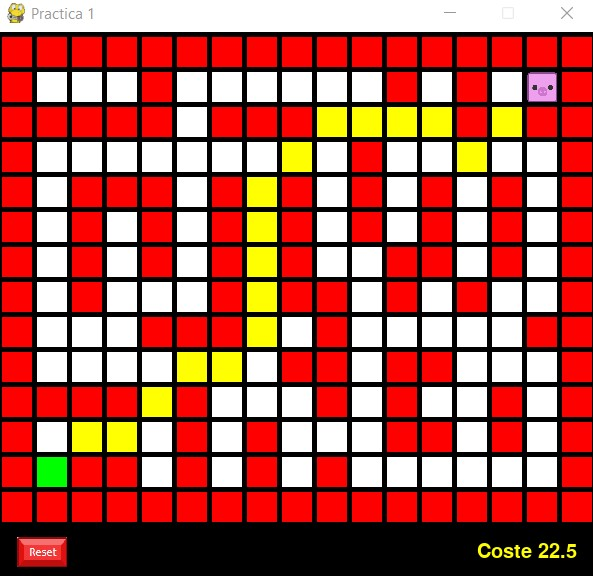

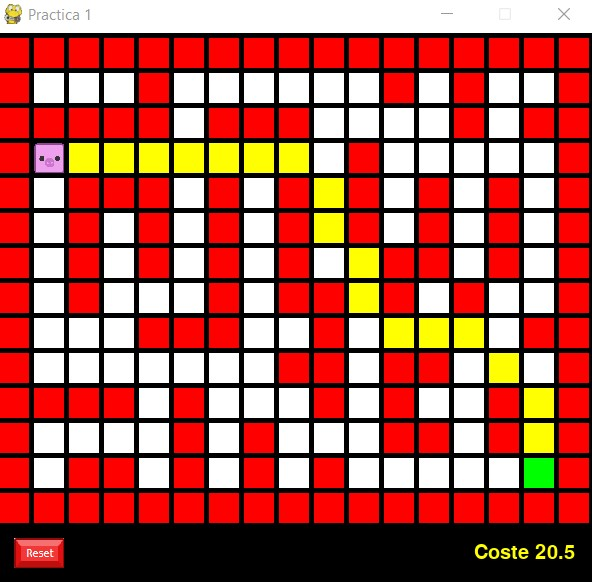

**3.6. Comparaciones y gráficas.**

En este apartado voy a crear un programa en python para crear una gráfica de las heurísticas en base a los nodos expandidos de cada una de ellas. De esa forma podré realizar un análisis más exhaustivo de las distinas heurísticas.

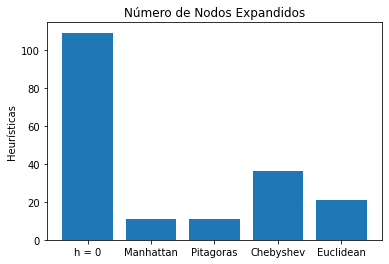

In [3]:
import matplotlib
import matplotlib.pyplot as plt

heuristicas = ['h = 0', 'Manhattan', 'Pitagoras', 'Chebyshev', 'Euclidean']
nodos = [109, 11, 11, 36, 21]

fig, ax = plt.subplots()

ax.set_ylabel('Heurísticas')
ax.set_title('Número de Nodos Expandidos')

plt.bar(heuristicas, nodos)
# plt.savefig('result.png')
plt.show()

Los datos de este gráfico se corresponden con los resultados al realizar el siguiente camino:

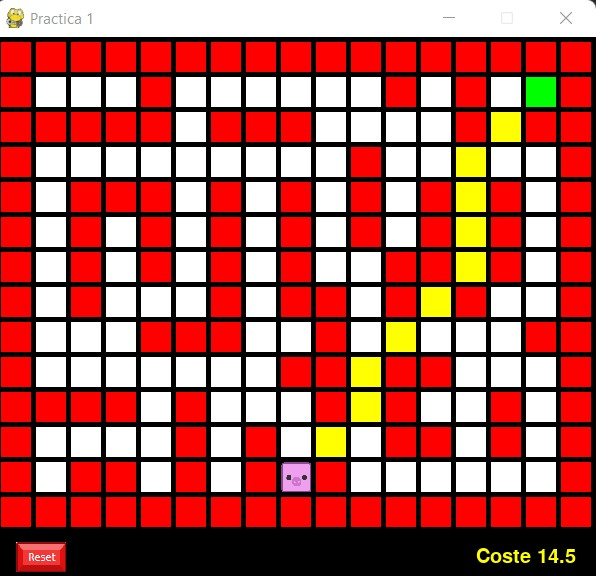

Ejemplo con otro camino.

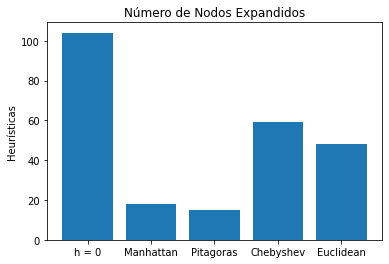

In [2]:
import matplotlib
import matplotlib.pyplot as plt

heuristicas = ['h = 0', 'Manhattan', 'Pitagoras', 'Chebyshev', 'Euclidean']
nodos = [104, 18, 15, 59, 48]

fig, ax = plt.subplots()

ax.set_ylabel('Heurísticas')
ax.set_title('Número de Nodos Expandidos')

plt.bar(heuristicas, nodos)
# plt.savefig('result.png')
plt.show()

Los datos del gráfico corresponden con ese otro camino:

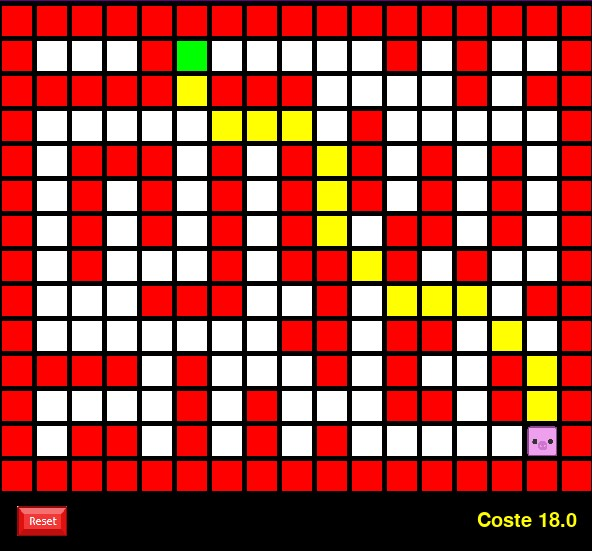

Si ejecutamos ese código podremos ver la gráfica resultante del análisis de los nodos expandidos separados por heurística.

A su vez, también he creado otro programa el cual se ejecuta a través de un archivo externo. Sin embargo en este entorno no podría adjuntar ese archivo, por lo tanto lo comprimiré en el .zip de la entrega para que el profesor pueda ejecutar ese otro programa y ver también la gráfica del resultado mediante un archivo externo también.

Ahora que ya tenemos una gráfica, puedo hacer el análisis de las distintas heurísticas.
En primer lugar observamos un pico muy alto de nodos explorados, el cual corresponde con la búsqueda en anchura (h = 0), el cuál alcanza más de 100 nodos expandidos. Esta heurística es admisible, encuentra siempre el camino óptimo, sin embargo requiere demasiado cálculo computacional.

En segundo lugar vemos la distancia de Manhattan, la cual solo explora unos 10 nodos, lo cual reduce drásticamente la heurística anterior. Sin embargo, el inconveniente que presenta esque no es admisible, por lo tanto no es una heurística fiable para encontrar el camino óptimo.

En tercer lugar observamos la distancia de Pitágoras, la cual presenta los mismos nodos explorados que Manhattan, unos 10 nodos. El problema de esta heurística esque no garantiza encontrar el camino óptimo, por lo tanto mejora mucho a la distancia de Manhattan, pero no es segura en todos los casos.

En cuarto lugar vemos la distancia de Chebyshev, la cual expande alrededor de los 40 nodos, lo cual mejora en gran medida a la búsqueda por anchura, pero es un poco más lenta que las dos anteriores. Afortunadamente es una heurística fiable, ya que siempre encuentra el camino óptimo. 

Y para finalizar analizamos la distancia euclídea, la cual expande unos 20 nodos, y se posiciona como la mejor, si atendemos a número de nodos expandidos y a si es admisible, por lo tanto supera a la distancia de Manhattan y Pitágoras(Cuadrática), ya que esta sí es admisible y garantiza alcanzar el camino óptimo.

# **4. Ejemplos del funcionamiento del algoritmo en distintos mapas.**

Para este apartado he creado 3 nuevos mapas para probar como funciona cada una de las heurísticas atendiendo a distintos mapas. Adjunto algunos de los caminos realizados en dichos mapas.


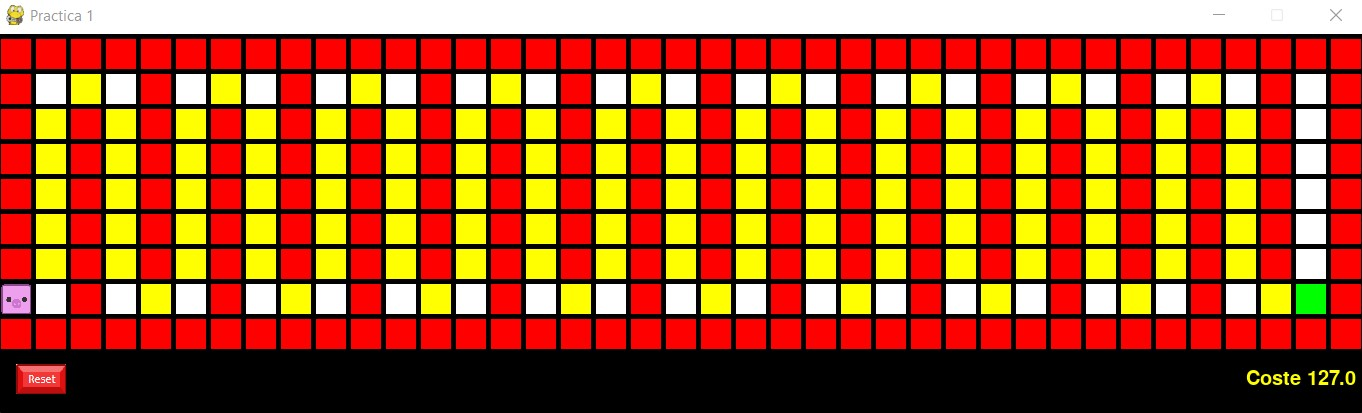

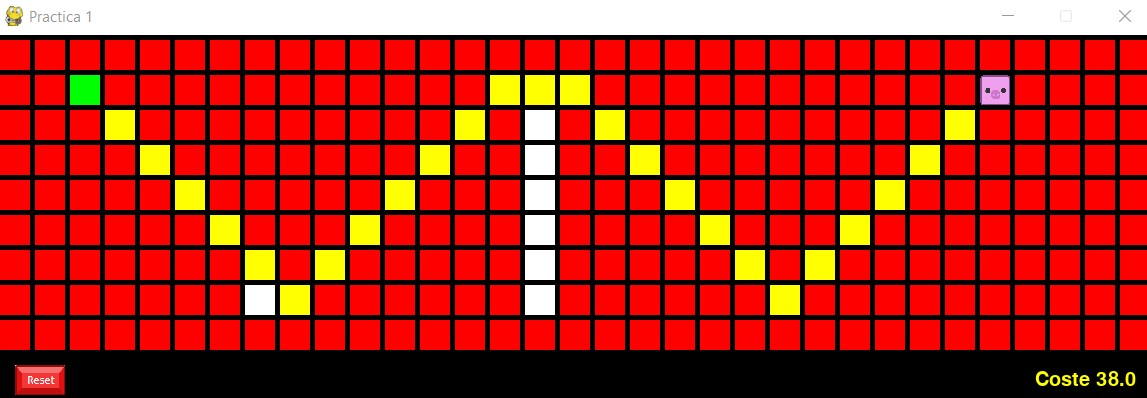

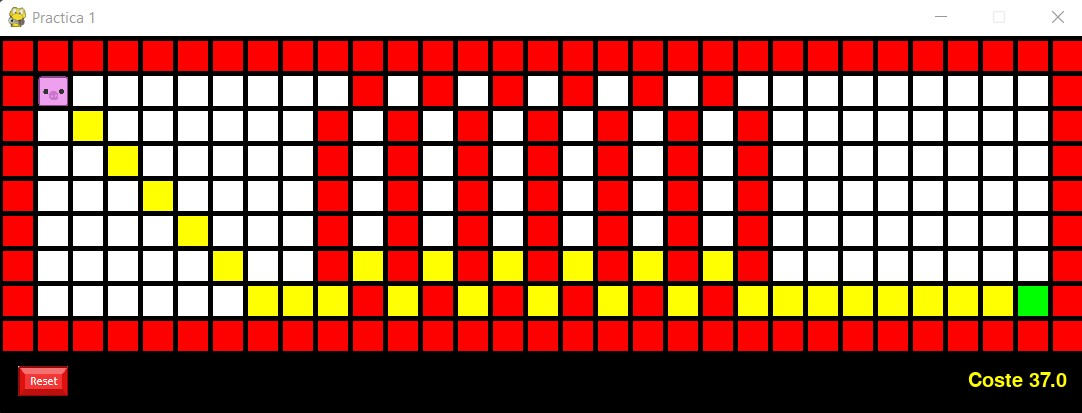

Los mapas ajuntados arriba corresponden con los archivos "mapaTest.txt", "mapaTest.txt2" y "mapaTest.txt3" respectivamente.